In [31]:
import sys 
sys.path.append('/Users/willknott/Desktop/DIS/coursework/pds/wdk24/src')

%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
from generation import generate_from_total_pdf
from distributions import total_cdf
from hypothesis_test import signal_background_test

In [33]:
# True parameter values
true_params, alpha, beta = {'f': 0.1, 'lam': 0.5, 'mu': 5.28, 'sigma': 0.018}, 5, 5.6
random_shifts = {
    'f': np.random.uniform(-0.09, 0.5), 
    'lam': np.random.uniform(-0.3, 1), 
    'mu': np.random.uniform(-0.25, 0.3), 
    'sigma': np.random.uniform(-0.01, 0.03)
}
starting_params = {}
for param in true_params:
    starting_params[param] = true_params[param] + random_shifts[param]
    starting_params[param] = float(f'{starting_params[param]:.4}')

In [34]:
n_datapoints = 60
n_init = 25
N = np.logspace(1, 6, num=n_datapoints).astype(int)
N = np.linspace(40000, 80000, n_datapoints).astype(int)
ns = np.array([n_init for _ in range(n_datapoints)])

all_data = [np.array([generate_from_total_pdf(N_events) for _ in range(n_init)]) for N_events in N]


In [35]:
def error_on_p(p, n):
    return np.sqrt((p*(1-p))/n)

### Hypothesis Testing

In [36]:
P = []
P_err = []
validities = []
for i, group_i in enumerate(all_data):
    n_i = ns[i]

    r_discoveries = 0
    for dataset in group_i:

        discovery, _, _ = signal_background_test(dataset=dataset, cdf=total_cdf, starting_params=starting_params)

        if discovery=='h0 invalid' or discovery=='h1 invalid':
            n_i -= 1

        if discovery==True:
            r_discoveries += 1

    p = r_discoveries/n_i
    P.append(p)
    P_err.append(error_on_p(p, n_i))

In [ ]:
print(N)
print(P)
print(P_err)

[40000 41025 42051 43076 44102 45128 46153 47179 48205 49230 50256 51282
 52307 53333 54358 55384 56410 57435 58461 59487 60512 61538 62564 63589
 64615 65641 66666 67692 68717 69743 70769 71794 72820 73846 74871 75897
 76923 77948 78974 80000]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04, 0.0, 0.04, 0.08, 0.0, 0.12, 0.16, 0.24, 0.28, 0.4, 0.24, 0.56, 0.68, 0.64, 1.0, 0.92, 0.84, 1.0, 1.0, 0.96, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.96, 0.96, 1.0, 1.0, 0.96, 1.0, 1.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.039191835884530846, 0.0, 0.039191835884530846, 0.054258639865002144, 0.0, 0.06499230723708768, 0.07332121111929343, 0.0854166260162505, 0.0897997772825746, 0.09797958971132711, 0.0854166260162505, 0.09927738916792685, 0.0932952303175248, 0.096, 0.0, 0.05425863986500213, 0.07332121111929345, 0.0, 0.0, 0.039191835884530866, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.039191835884530866, 0.039191835884530866, 0.0, 0.0, 0.039191835884530866, 0.0, 0.0]


In [ ]:
# successes = []
# for N_i in Ns:
#     n_discoveries = 0
#     for _ in range(n_init):
#         dataset = generate_from_total_pdf(N_i)

#         discovery, _, _ = signal_background_test(dataset=dataset, cdf=total_cdf, starting_params=starting_params)

#         if discovery:
#             n_discoveries += 1
#     successes.append(n_discoveries)

# dict(zip(Ns, successes))

# Finding `N_90`

In [ ]:
N

array([40000, 41025, 42051, 43076, 44102, 45128, 46153, 47179, 48205,
       49230, 50256, 51282, 52307, 53333, 54358, 55384, 56410, 57435,
       58461, 59487, 60512, 61538, 62564, 63589, 64615, 65641, 66666,
       67692, 68717, 69743, 70769, 71794, 72820, 73846, 74871, 75897,
       76923, 77948, 78974, 80000])

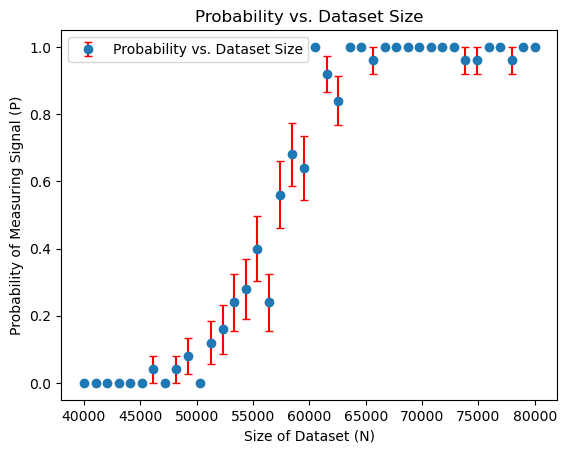

In [ ]:
fig, ax = plt.subplots()
ax.errorbar(N, P, yerr=P_err, fmt='o', ecolor='red', capsize=3, label='Probability vs. Dataset Size')
ax.set_xlabel('Size of Dataset (N)')
ax.set_ylabel('Probability of Measuring Signal (P)')
ax.set_title('Probability vs. Dataset Size')
ax.legend()